# **CNN COMPARE** #


#Step 1: Installing Hugging Face transformers and torchinfo

In [37]:
!pip install torchinfo torchmetrics accelerate wandb

# Step 2: Mount Google Drive

In [38]:
#@markdown # Connect Google Drive
from google.colab import drive
from IPython.display import clear_output
import ipywidgets as widgets
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)
Shared_Drive = "" #@param {type:"string"}
#@markdown - Leave empty if you're not using a shared drive

print("Connecting...")
drive.mount('/content/gdrive')

if Shared_Drive!="" and os.path.exists("/content/gdrive/Shareddrives"):
  mainpth="Shareddrives/"+Shared_Drive
else:
  mainpth="MyDrive"

clear_output()
inf('\u2714 Done','success', '50px')

#@markdown ---

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [47]:
%cd /content/gdrive/MyDrive/FAIR/2024/


/content/gdrive/MyDrive/FAIR/2024


In [ ]:
# !wget  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [ ]:
# !tar -xvzf ./cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./cifar-10-batches-py'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./cifar-10-batches-py/test_batch
./cifar-10-batches-py/data_batch_3
./cifar-10-batches-py/data_batch_2
./cifar-10-batches-py/data_batch_5
./cifar-10-batches-py/data_batch_1
./cifar-10-batches-py/data_batch_4
./cifar-10-batches-py/batches.meta


In [49]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report, f1_score, accuracy_score, precision_score, recall_score
import torchvision.datasets as datasets

import math
import wandb


In [50]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batchSize = 4 #200

dataset = torchvision.datasets.CIFAR10(root="/content/gdrive/MyDrive/FAIR/2024/", train=True, download=False, transform=transform) #transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root="/content/gdrive/MyDrive/FAIR/2024/", train=False, download=False, transform=transform) #transforms.ToTensor())

In [51]:
trainset, validateset = random_split(dataset, [45000, 5000])

trainloader = DataLoader(trainset, batchSize, shuffle=True)
validateloader = DataLoader(validateset, batchSize, shuffle=True)
testloader = DataLoader(testset, batch_size=batchSize, shuffle=False)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [ ]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# batch_size = 4

# trainset = torchvision.datasets.CIFAR10(root='/content/gdrive/MyDrive/FAIR/2024/cifar-10-batches-py', train=True,
#                                         download=False, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='/content/gdrive/MyDrive/FAIR/2024/cifar-10-batches-py', train=False,
#                                        download=False, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

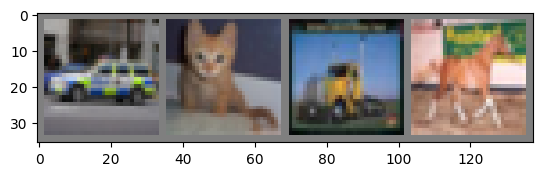

car   cat   truck horse


In [52]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batchSize)))

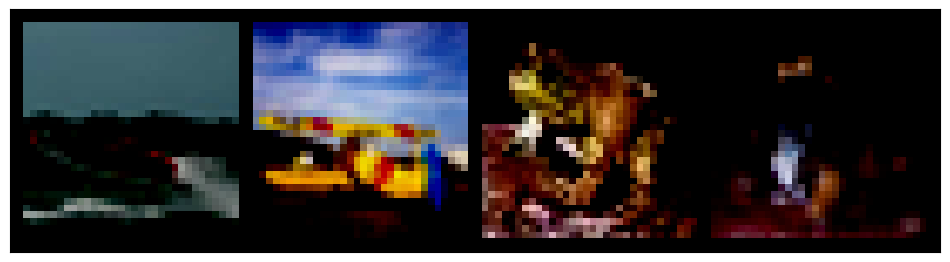

In [53]:
for images, labels in trainloader:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=20).permute(1, 2, 0))
    break

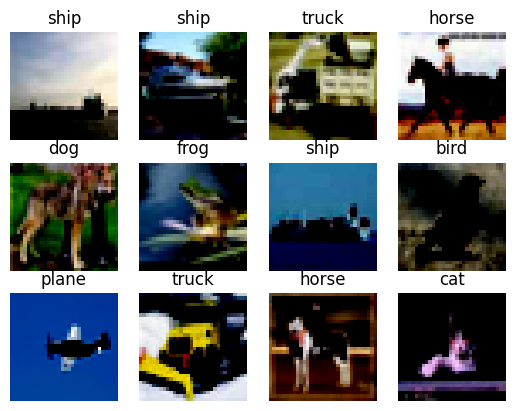

In [54]:
for i in range(0, 12):
    img, label = validateset[i]
    plt.subplot(3,4,i+1)
    plt.title(classes[label])
    plt.axis('off')
    plt.imshow(img.permute(1, 2, 0))

In [55]:
class Cifar10Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        # define all the transformers sequencially
        self.network = nn.Sequential(

            # here we define 3 channels as our inpur, 32 channels as the output,
            # the size of the kernel, the padding and the stride
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            # apply a max pool layer
            nn.MaxPool2d(2, 2),

            # continue the process in the next two layers
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            # final layer, we decrease the number of outputs to 10, which is our number of classes
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def trainingStep(self, batch):
        # unpack the images and labels from the
        images, labels = batch[0].to(device), batch[1].to(device) #batch

        # call the model itself
        out = self(images)

        # compute the loss
        loss = F.cross_entropy(out, labels)

        return loss

    def accuracy(self, outputs, labels):
        _, preds = torch.max(outputs, dim=1)
        return torch.tensor(torch.sum(preds == labels).item() / len(preds))

    def validationStep(self, batch):
        # images, labels = batch
        images, labels = batch[0].to(device), batch[1].to(device) #batch

        out = self(images)
        loss = F.cross_entropy(out, labels)
        accuracy = self.accuracy(out, labels)

        return {"loss": loss, "accuracy": accuracy}

    def validationEpochEnd(self, outputs):

        batchLosses = [row["loss"] for row in outputs]
        epochLosses = torch.stack(batchLosses).mean()
        batchAcc = [row["accuracy"] for row in outputs]
        epochAcc = torch.stack(batchAcc).mean()

        return {"loss": epochLosses.item(), "accuracy": epochAcc.item()}

    def forward(self, x):
        return self.network(x)

In [56]:
# the evaluation model, please note we will disable the gradiant descent on this method
@torch.no_grad()
def evaluateModel(model, validationLoader):
    # puts the model in eval mode
    model.eval()

    out = [model.validationStep(batch) for batch in validationLoader]

    return model.validationEpochEnd(out)

In [57]:
# method for training the model
def trainModel(epochs, lr, model, trainLoader, validationLoader, optimizationFunction=torch.optim.SGD):
  optimizer = optimizationFunction(model.parameters(), lr)
  running_loss = 0.0
  for epoch in range(epochs):
      print(f"training epoch {epoch}")
      # puts the model in train mode
      model.train()
      trainingLosses = []

      # training
      # for batch in trainloader:
      for i, batch in enumerate(trainloader, 0):
        # get the inputs
        # inputs, labels = data
        loss = model.trainingStep(batch)
        trainingLosses.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()



        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
          avg_loss = running_loss / 2000
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {avg_loss:.3f}')
          wandb.log({"epoch": epoch + 1, "loss": avg_loss})
          running_loss = 0.0

      print(f"after training epoch {epoch} we get results {evaluateModel(model, validationLoader)}")
  wandb.finish()

In [58]:
# Setup device GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {device}")


Training on device: cpu


In [15]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [16]:
epochs = 10
# Initialize wandb
wandb.init(project="fair2024-cnn", entity="toandang76")

# Configurations and hyperparameters tracked by wandb
wandb.config = {
  "learning_rate": 0.001,
  "epochs": epochs,
  "batch_size": len(trainloader.dataset) / len(trainloader)
}

wandb: Currently logged in as: toandang76. Use `wandb login --relogin` to force relogin


In [59]:
# instantiate the model
model = Cifar10Classifier()
model.to(device)
# do an evaluation of the model on the tra
evaluateModel(model, validateloader)

{'loss': 2.3030335903167725, 'accuracy': 0.09860000014305115}

In [18]:
%%time
trainModel(epochs, 0.001, model, trainLoader=trainloader, validationLoader=validateloader, optimizationFunction=torch.optim.Adam)

training epoch 0
[1,  2000] loss: 2.035
[1,  4000] loss: 1.799
[1,  6000] loss: 1.643
[1,  8000] loss: 1.530
[1, 10000] loss: 1.447
after training epoch 0 we get results {'loss': 1.4464747905731201, 'accuracy': 0.4618000090122223}
training epoch 1
[2,  2000] loss: 2.215
[2,  4000] loss: 1.302
[2,  6000] loss: 1.261
[2,  8000] loss: 1.256
[2, 10000] loss: 1.215
after training epoch 1 we get results {'loss': 1.2555780410766602, 'accuracy': 0.5600000023841858}
training epoch 2
[3,  2000] loss: 1.915
[3,  4000] loss: 1.163
[3,  6000] loss: 1.128
[3,  8000] loss: 1.114
[3, 10000] loss: 1.130
after training epoch 2 we get results {'loss': 1.0729128122329712, 'accuracy': 0.6154000163078308}
training epoch 3
[4,  2000] loss: 1.730
[4,  4000] loss: 1.057
[4,  6000] loss: 1.078
[4,  8000] loss: 1.091
[4, 10000] loss: 1.060
after training epoch 3 we get results {'loss': 1.1625336408615112, 'accuracy': 0.6014000177383423}
training epoch 4
[5,  2000] loss: 1.647
[5,  4000] loss: 1.036
[5,  6000] lo

epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
loss,▇▆▅▅█▃▃▃▆▃▂▂▆▂▂▂▅▂▂▂▅▂▂▂▄▂▂▂▄▂▁▁▄▁▁▁▄▁▁▁
epoch,10
loss,0.89344


CPU times: user 11min 57s, sys: 8.15 s, total: 12min 5s
Wall time: 12min 22s


In [19]:
#Save model
def save_model(model, path):
  """Saves the trained PyTorch model to a specified path."""
  torch.save(model.state_dict(), path)

In [20]:
PATH = './cnn_cifar_net.pth'
save_model(model, PATH)

In [ ]:
# import torch.optim as optim

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [63]:
#Load model
PATH = './cnn_cifar_net.pth'
model = Cifar10Classifier()
model.load_state_dict(torch.load(PATH,map_location=torch.device(device)))
model.to(device)

Cifar10Classifier(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fe

In [64]:
print(f"validation dataset accuracy: {evaluateModel(model, validateloader)}")

validation dataset accuracy: {'loss': 1.0055103302001953, 'accuracy': 0.6438000202178955}


In [65]:
print(f"test dataset accuracy: {evaluateModel(model, testloader)}")


test dataset accuracy: {'loss': 1.095596432685852, 'accuracy': 0.6157000064849854}


In [66]:
def predictImage(img, model):

    xb = img.unsqueeze(0)
    yb = model(xb)
    _, pred = torch.max(yb, dim=1)

    return pred[0].item()

<ipython-input-67-0eadafc9077f>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i + 1)


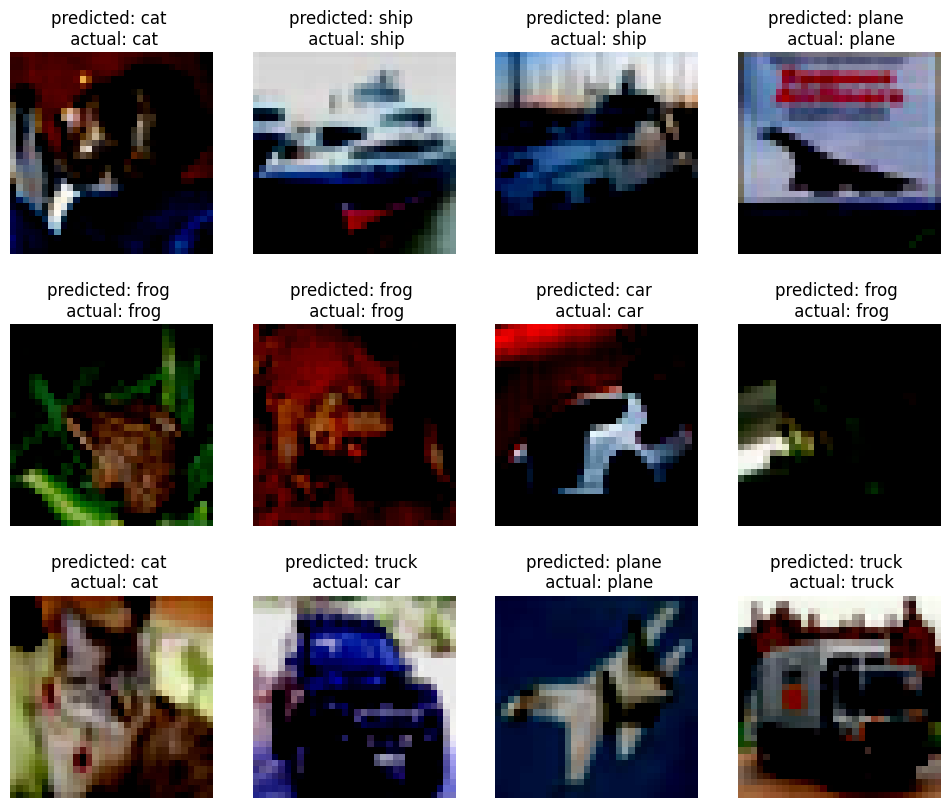

In [67]:
with torch.no_grad():

    plt.subplots(figsize=(12, 10))

    for i in range(0, 12):
        img, label = testset[i]

        predictedValue = predictImage(img, model)


        plt.subplot(3, 4, i + 1)
        plt.title(f"predicted: {classes[predictedValue]} \n actual: {classes[label]}")
        plt.axis('off')
        plt.imshow(img.permute(1, 2, 0))

### Confusion Matrix

In [68]:
predictions = np.empty((0, len(testset)), np.int32)
actualValues = np.empty((0, len(testset)), np.int32)

with torch.no_grad():
    for i in range(0, len(testset)):
        testImg, testLabel = testset[i]
        predictedValue = predictImage(testImg, model)

        predictions = np.append(predictions, predictedValue)
        actualValues = np.append(actualValues, testLabel)

<Axes: >

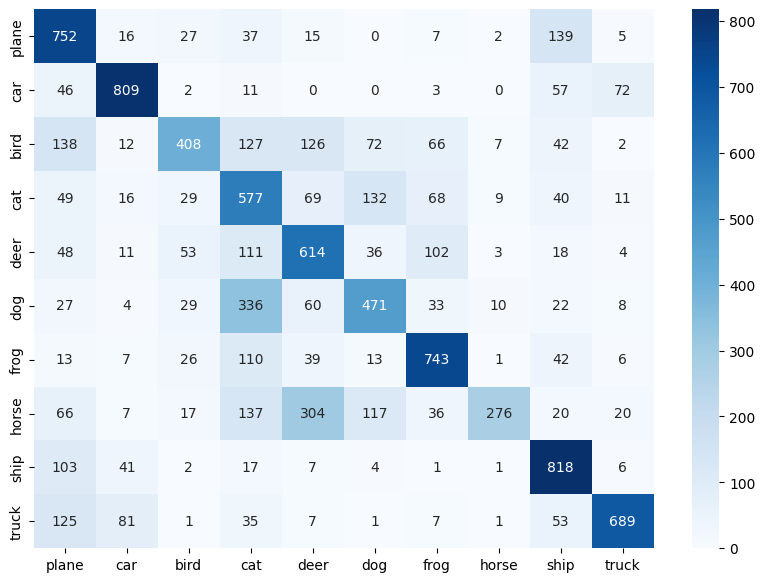

In [69]:
confusionMatrix = confusion_matrix(actualValues, predictions)

confusionMatrixDf = pd.DataFrame(confusionMatrix, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(confusionMatrixDf, annot=True, cmap='Blues', fmt='g')

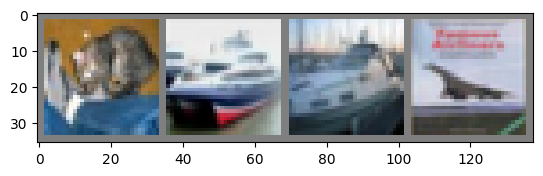

GroundTruth:  cat   ship  ship  plane


In [70]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [71]:
outputs = model(images)

In [72]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  plane plane


### Accuracy

In [76]:
correct = 0
total = 0
i=0
f1_test = 0
precision_test = 0
recall_test = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        f1_test += (f1_score(labels, predicted, average='weighted'))
        precision_test += (precision_score(labels, predicted, average='weighted'))
        recall_test += (recall_score(labels, predicted, average='weighted'))
        i+=1

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
print(f'F1 score: {100 * f1_test/i}')
print(f'Precision: {100 * precision_test/i}')
print(f'Recall: {100 *recall_test/i}')


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classificat

Accuracy of the network on the 10000 test images: 61 %
F1 score: 61.25704761904762
Precision: 63.799999999999976
Recall: 61.57


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 75.2 %
Accuracy for class: car   is 80.9 %
Accuracy for class: bird  is 40.8 %
Accuracy for class: cat   is 57.7 %
Accuracy for class: deer  is 61.4 %
Accuracy for class: dog   is 47.1 %
Accuracy for class: frog  is 74.3 %
Accuracy for class: horse is 27.6 %
Accuracy for class: ship  is 81.8 %
Accuracy for class: truck is 68.9 %
